In [3]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
def random_points(numpoints,numdimensions):

  points = np.random.normal(size=(numpoints, numdimensions))
  return points

In [5]:
def average_distance_sp(points, selected_point):

  num_of_points = len(points) - 1
  total_dist = 0

  if(len(points) == 0):
    return None

  else:
    for point in points:
      if (point != selected_point).any():
        distance = sqrt(sum((a - b)**2 for a, b in zip(point, selected_point)))
        total_dist += distance

    return total_dist / num_of_points

In [6]:
def minimum_distance_sp(points, selected_point):

  if(len(points) == 0):
    return None

  min_dist = float('inf')

  for point in points:
    if (point != selected_point).any():
      dist = sqrt(sum((a - b)**2 for a, b in zip(point, selected_point)))
      min_dist = min(min_dist, dist)

  return min_dist

In [7]:
def closest_to_average_ratio(min_dist, avg_dist):
  ratio = min_dist/avg_dist
  return ratio

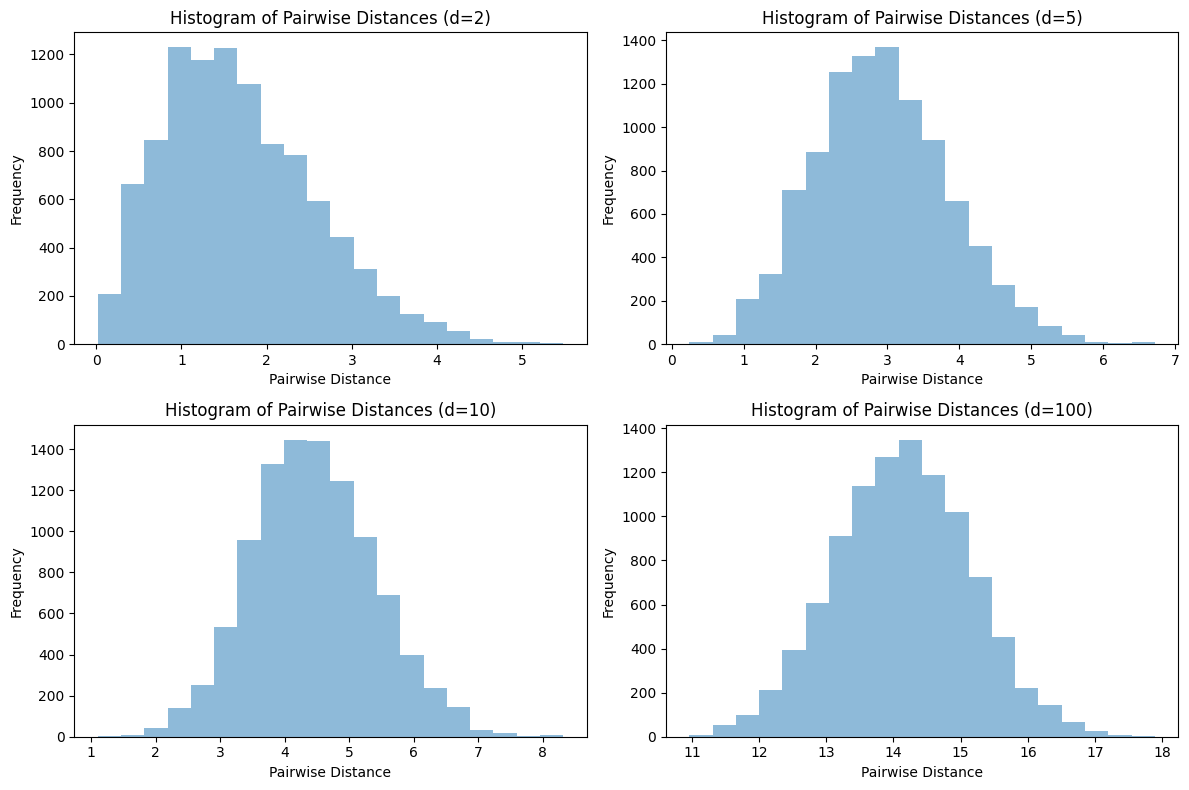

In [8]:
def generate_data(d, num_points):

  Sd =  np.random.normal(size=(num_points, d))
  return Sd

def select_random_point(data):

  num_points = data.shape[0]
  random_index = np.random.randint(0, num_points)
  return data[random_index]


def pairwise_distances(data):
    distances = []
    for i, point1 in enumerate(data):
        for j, point2 in enumerate(data):
            if i != j:
                distance = sqrt(sum((a - b)**2 for a, b in zip(point1, point2)))
                distances.append(distance)
    return distances


dimensions_to_plot = [2, 5, 10, 100]

plt.figure(figsize=(12, 8))

for i, d in enumerate(dimensions_to_plot):
    plt.subplot(2, 2, i+1)
    Sd = generate_data(d, 100)
    distances = pairwise_distances(Sd)
    plt.hist(distances, bins=20, alpha=0.5)
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Pairwise Distances (d={d})')

plt.tight_layout()
plt.show()


Discussion of the plots: when the dimension is lower (for example d = 2), the distribution of the pairwise distances of the random points are lower. As the d gets higher (for example d = 100), the distribution of the pairwise distances of the random points get higher. We see the highest pairwise distance when d = 100.

In [10]:
for d in range(1, 10):
  Sd = generate_data(d, 10)
  Ad = []
  for i in range(1,10):
    rd_point = select_random_point(Sd)
    avg_dist = average_distance_sp(Sd, rd_point)
    min_dist = minimum_distance_sp(Sd, rd_point)
    ratio = closest_to_average_ratio(min_dist, avg_dist)
    Ad.append(avg_dist)
    Ad.append(min_dist)
    Ad.append(ratio)

# COMPUTING MEAN
mean = np.mean(Ad)

# COMPUTING STD DEV
std_dev = np.std(Ad)


print("Mean of Ad:", mean)
print("Std Dev of Ad:", std_dev)

Mean of Ad: 2.9794207524103653
Std Dev of Ad: 1.639753151686153


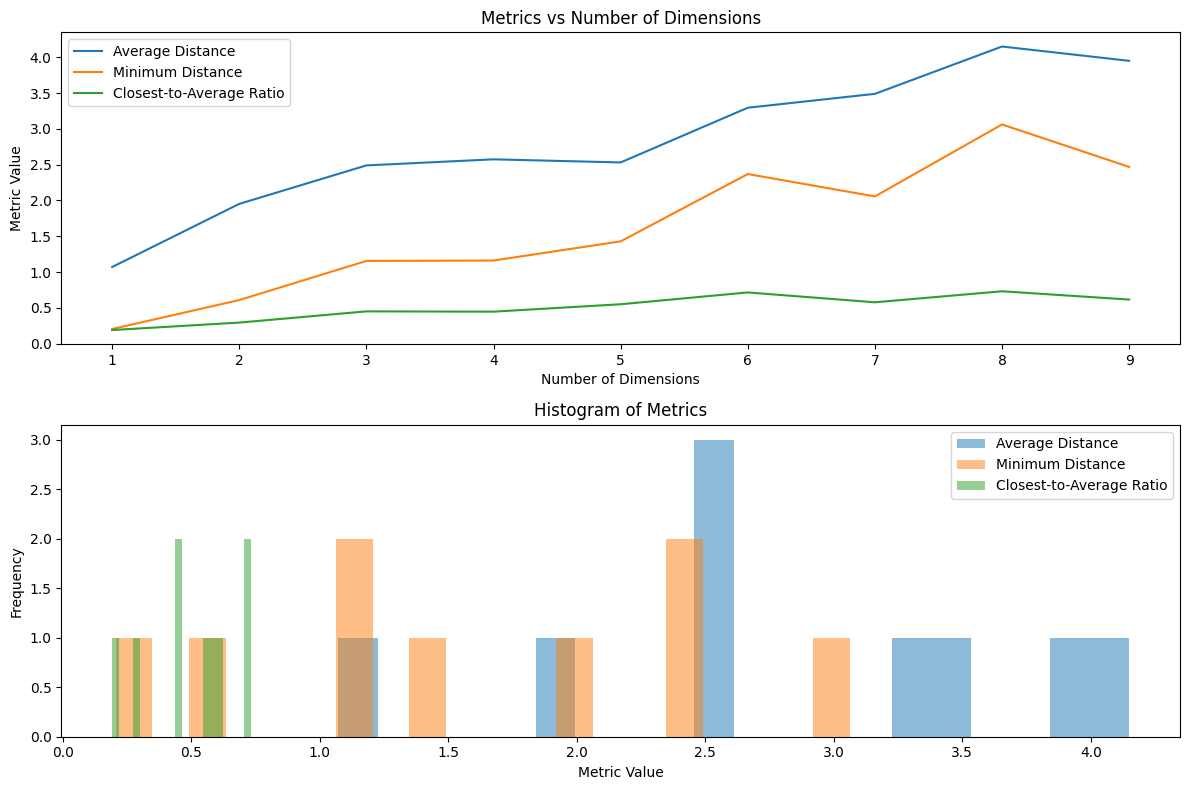

In [14]:
dimensions = range(1, 101)
mean_avg_dist = []
mean_min_dist = []
mean_ratio = []

for d in dimensions:
    Sd = generate_data(d, 1000)
    avg_dists = []
    min_dists = []
    ratios = []

    for _ in range(101):  # Repeat the calculation 100 times for each dimension
        rd_point = select_random_point(Sd)
        avg_dist = average_distance_sp(Sd, rd_point)
        min_dist = minimum_distance_sp(Sd, rd_point)
        ratio = closest_to_average_ratio(min_dist, avg_dist)
        avg_dists.append(avg_dist)
        min_dists.append(min_dist)
        ratios.append(ratio)

    mean_avg_dist.append(np.mean(avg_dists))
    mean_min_dist.append(np.mean(min_dists))
    mean_ratio.append(np.mean(ratios))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(dimensions, mean_avg_dist, label='Average Distance')
plt.plot(dimensions, mean_min_dist, label='Minimum Distance')
plt.plot(dimensions, mean_ratio, label='Closest-to-Average Ratio')
plt.xlabel('Number of Dimensions')
plt.ylabel('Metric Value')
plt.title('Metrics vs Number of Dimensions')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(mean_avg_dist, bins=20, alpha=0.5, label='Average Distance')
plt.hist(mean_min_dist, bins=20, alpha=0.5, label='Minimum Distance')
plt.hist(mean_ratio, bins=20, alpha=0.5, label='Closest-to-Average Ratio')
plt.xlabel('Metric Value')
plt.ylabel('Frequency')
plt.title('Histogram of Metrics')
plt.legend()

plt.tight_layout()
plt.show()

QUESTION 2


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
tf.keras.datasets.fashion_mnist.load_data()
fashion_mnist = fetch_openml('Fashion-MNIST', data_home='./data')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best k value: 7


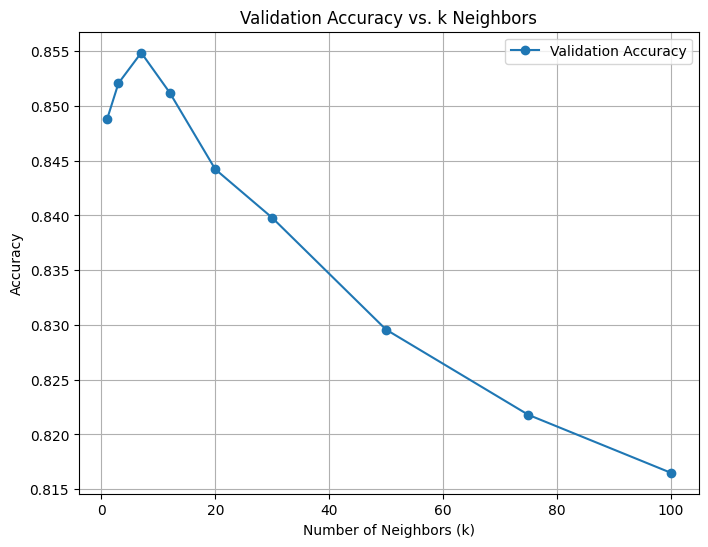

Test Accuracy: 0.8527857142857143


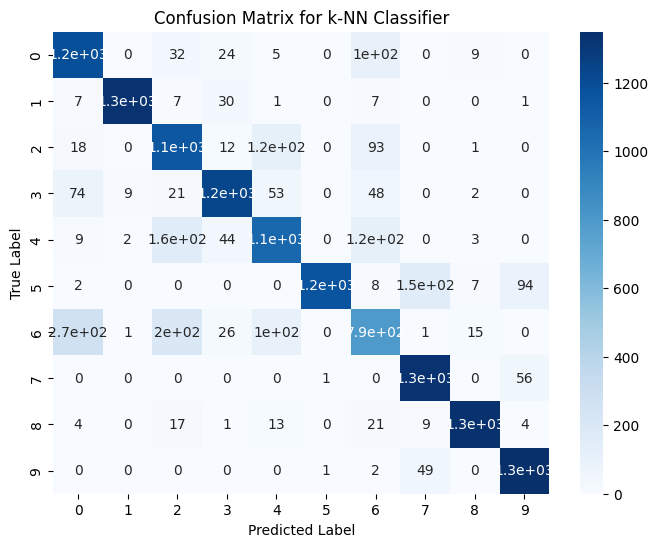

Class 0 is sometimes misclassified as class 2 (32 times).
Class 0 is sometimes misclassified as class 3 (24 times).
Class 0 is sometimes misclassified as class 6 (103 times).
Class 1 is sometimes misclassified as class 3 (30 times).
Class 2 is sometimes misclassified as class 0 (18 times).
Class 2 is sometimes misclassified as class 3 (12 times).
Class 2 is sometimes misclassified as class 4 (119 times).
Class 2 is sometimes misclassified as class 6 (93 times).
Class 3 is sometimes misclassified as class 0 (74 times).
Class 3 is sometimes misclassified as class 2 (21 times).
Class 3 is sometimes misclassified as class 4 (53 times).
Class 3 is sometimes misclassified as class 6 (48 times).
Class 4 is sometimes misclassified as class 2 (155 times).
Class 4 is sometimes misclassified as class 3 (44 times).
Class 4 is sometimes misclassified as class 6 (117 times).
Class 5 is sometimes misclassified as class 7 (153 times).
Class 5 is sometimes misclassified as class 9 (94 times).
Class 6 i

In [ ]:
X = fashion_mnist['data']
y = fashion_mnist['target']


X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


knn = KNeighborsClassifier()
k_neighbors_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]


best_k = None
best_accuracy = 0
validation_accuracies = []

for k in k_neighbors_values:
  knn.n_neighbors = k
  knn.fit(X_train, y_train)
  y_pred_val = knn.predict(X_val)
  accuracy = accuracy_score(y_val, y_pred_val)
  validation_accuracies.append(accuracy)

  if accuracy > best_accuracy:
    best_k = k
    best_accuracy = accuracy

print("Best k value:", best_k)

plt.figure(figsize=(8, 6))
plt.plot(k_neighbors_values, validation_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs. k Neighbors')
plt.grid(True)
plt.legend()
plt.show()

X_train_all = np.concatenate((X_train, X_val))
y_train_all = np.concatenate((y_train, y_val))
knn.n_neighbors = best_k
knn.fit(X_train_all, y_train_all)


y_pred_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


cm = confusion_matrix(y_test, y_pred_test)


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN Classifier')
plt.show()


for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    if i != j and cm[i, j] > 10:
      print(f"Class {i} is sometimes misclassified as class {j} ({cm[i, j]} times).")